Fahmi Nanda saputro_1103200203

In [ ]:
#melakukan install feature engine untuk melakukan teknik-teknik rekayasa fitur (feature engineering) dalam analisis data.
!pip install feature_engine

In [ ]:
#Melakukan hubungan dengan Gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
#Import library pandas untuk melakukan pengolahan dataframe
import pandas as pd


file_path = '/content/drive/MyDrive/dataset/fastfood_calories.csv'

#Melakukan pengubahan dataset menjadi dataframe
df = pd.read_csv(file_path)

# Tampilkan keseluruhan dataframe
df

,Unnamed: 0,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,1,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,2,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,3,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,4,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,5,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,511,Taco Bell,Spicy Triple Double Crunchwrap,780,340,38,10.0,0.5,50,1850,87,9.0,8,23.0,20.0,10.0,25.0,Other
511,512,Taco Bell,Express Taco Salad w/ Chips,580,260,29,9.0,1.0,60,1270,59,8.0,7,23.0,NaN,NaN,NaN,Other
512,513,Taco Bell,Fiesta Taco Salad-Beef,780,380,42,10.0,1.0,60,1340,74,11.0,7,26.0,NaN,NaN,NaN,Other
513,514,Taco Bell,Fiesta Taco Salad-Chicken,720,320,35,7.0,0.0,70,1260,70,8.0,8,32.0,NaN,NaN,NaN,Other


In [23]:
#Melakukan identifikasi setiap kolom seperti type data kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   515 non-null    int64  
 1   restaurant   515 non-null    object 
 2   item         515 non-null    object 
 3   calories     515 non-null    int64  
 4   cal_fat      515 non-null    int64  
 5   total_fat    515 non-null    int64  
 6   sat_fat      515 non-null    float64
 7   trans_fat    515 non-null    float64
 8   cholesterol  515 non-null    int64  
 9   sodium       515 non-null    int64  
 10  total_carb   515 non-null    int64  
 11  fiber        503 non-null    float64
 12  sugar        515 non-null    int64  
 13  protein      514 non-null    float64
 14  vit_a        301 non-null    float64
 15  vit_c        305 non-null    float64
 16  calcium      305 non-null    float64
 17  salad        515 non-null    object 
dtypes: float64(7), int64(8), object(3)
memory usage: 7

In [24]:
#Melakukan perhitungan nilai Nan pada setiap kolom
jumlah_nan=df.isna().sum()
print("Jumlah Nan dalam setiap kolom ")
#Menampilkan nilai Nan
print(jumlah_nan)

Jumlah Nan dalam setiap kolom 
Unnamed: 0       0
restaurant       0
item             0
calories         0
cal_fat          0
total_fat        0
sat_fat          0
trans_fat        0
cholesterol      0
sodium           0
total_carb       0
fiber           12
sugar            0
protein          1
vit_a          214
vit_c          210
calcium        210
salad            0
dtype: int64


In [25]:
#Melakukan imputasi dengan menggunakan teknik Randomsampler
from feature_engine.imputation import RandomSampleImputer
imputer=RandomSampleImputer(random_state=29)
imputer.fit(df)
df=imputer.transform(df)

In [26]:
#Menghitung nilai Nan di setiap kolom
jumlah_nan=df.isna().sum()
print("Jumlah Nan dalam setiap komputer")
print(jumlah_nan)

Jumlah Nan dalam setiap komputer
Unnamed: 0     0
restaurant     0
item           0
calories       0
cal_fat        0
total_fat      0
sat_fat        0
trans_fat      0
cholesterol    0
sodium         0
total_carb     0
fiber          0
sugar          0
protein        0
vit_a          0
vit_c          0
calcium        0
salad          0
dtype: int64


In [28]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
#Menentukan kolom target dan kolom feature
X=df['vit_a'].values.reshape(-1,1)
y=df['vit_c'].values
#Melakukan pemisahan data train dan data test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
#Melakukan pelatihan model menggunakan Algoritma SVR
svr_model=SVR(C=1000,gamma=0.5,kernel='rbf')
svr_model.fit(X_train,y_train)
y_pred=svr_model.predict(X_test)
#Menghting nilai Mse
mse=mean_squared_error(y_test,y_pred)
print(f'Mean Squared Error:{mse}')

Mean Squared Error:2103.5793488276863


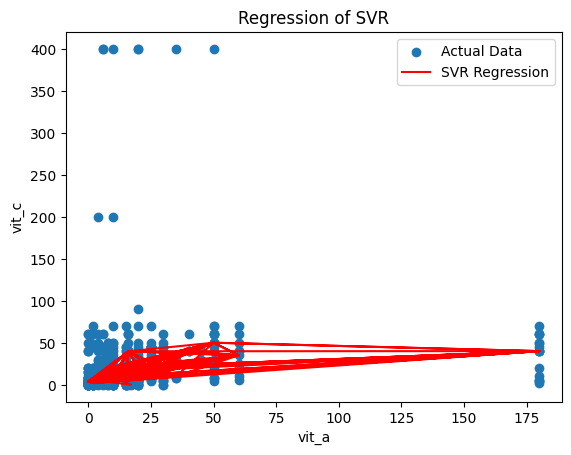

In [29]:
#Melakukan visualisasi
import matplotlib.pyplot as plt

plt.scatter(X,y,label='Actual Data')
plt.plot(X,svr_model.predict(X),color='red',label='SVR Regression')

plt.xlabel('vit_a')
plt.ylabel('vit_c')

plt.title('Regression of SVR')

plt.legend()
plt.show()

In [30]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'kernel':['rbf'],
    'C':[1000,10000,100000],
    'gamma':[0.5,0.05,0.005]
}

#Insiasialisasi Grid Seach CV
grid_search=GridSearchCV(svr_model,param_grid,cv=5)
#Melakukan pencarian grid yang terbaik
grid_search.fit(X_train,y_train)

best_params=grid_search.best_params_
print(f'Best Parameters:{best_params}')

#Mendapatkan Model terbaik
best_model=grid_search.best_estimator_
#Menguji model
y_pred=best_model.predict(X_test)

#Melakukan perhtungan nilai Mse
mse=mean_squared_error(y_test,y_pred)
print(f'Mean Squared Error on test:{mse}')

Best Parameters:{'C': 1000, 'gamma': 0.5, 'kernel': 'rbf'}
Mean Squared Error on test:2103.5793488276863


In [31]:
#Melakukan pemodelan dengan menggunakan SVR setelah melakukan pencarian GridSearchCV
model_baru=SVR(C=10000,gamma=0.5,kernel='rbf')
model_baru.fit(X,y)

SVR(C=10000, gamma=0.5)

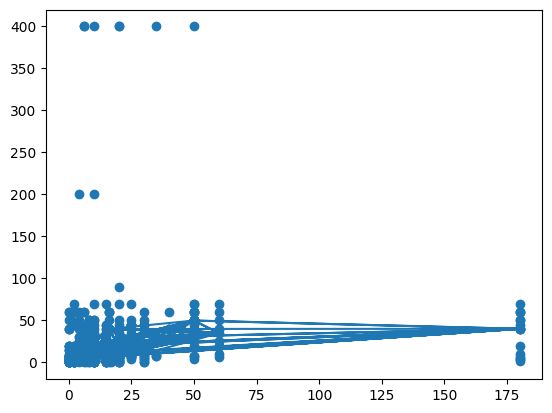

In [32]:
#Melakukan visualisasi
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.plot(X,model_baru.predict(X))